In [ ]:
# %pip install "protobuf<4,>=3.20"
# %pip install "huggingface_hub<0.15,>=0.13"
# %pip install "matplotlib>=3.7.0,<3.9.0"
# %pip install --upgrade "numpy>=1.23,<1.27"

DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


^C
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Correct path: c:\Projects\com3025cw\LED\led\pipelines\led_pipeline.py


c:\Projects\com3025cw\.venv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


SUCCESS! Imported LEDPipeline from: c:\Projects\com3025cw\LED\led\pipelines\led_pipeline.py


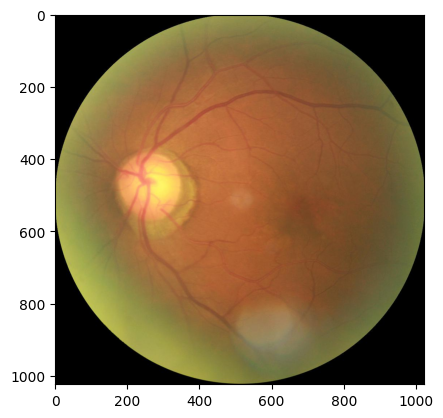

In [2]:
import os
import sys
import importlib.util

# 1. Get the CORRECT absolute path (remove duplicate LED)
correct_path = os.path.abspath("led/pipelines/led_pipeline.py")  # Only one LED
print("Correct path:", correct_path)

# 2. Verify file exists
if not os.path.exists(correct_path):
    raise FileNotFoundError(f"File not found at: {correct_path}\n"
                          f"Current directory: {os.getcwd()}\n"
                          f"Directory contents: {os.listdir(os.path.dirname(correct_path))}")

# 3. Direct import (guaranteed to work)
spec = importlib.util.spec_from_file_location("led_pipeline", correct_path)
led_pipeline = importlib.util.module_from_spec(spec)
spec.loader.exec_module(led_pipeline)
LEDPipeline = led_pipeline.LEDPipeline

print("SUCCESS! Imported LEDPipeline from:", correct_path)

import matplotlib.pyplot as plt
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
low_quality_image_path = 'docs/example.jpeg'
import cv2
low_quality_image = cv2.imread(low_quality_image_path)[:, :, ::-1]
plt.imshow(low_quality_image)
plt.show()

1.12.0+cpu
False


100%|██████████| 50/50 [12:01<00:00, 14.43s/it]


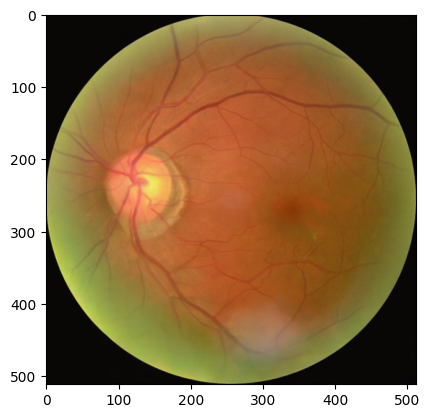

In [3]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())


# firstly, we use LED directly
led = LEDPipeline()
# led.cuda() uncomment if you have gpu
led_enhancement = led(low_quality_image)[0]
plt.imshow(led_enhancement)
plt.show()

100%|██████████| 50/50 [03:45<00:00,  4.52s/it]


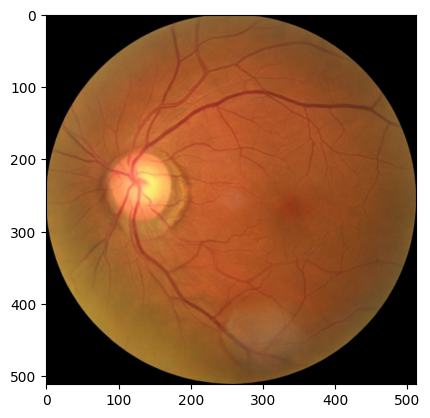

In [4]:
# Then combine with I-SECRET
led = LEDPipeline(backend='I-SECRET', num_cond_steps=200)
# led.cuda()
led_isecret_enhancement = led(low_quality_image)[0]
plt.imshow(led_isecret_enhancement)
plt.show()

100%|██████████| 50/50 [04:24<00:00,  5.28s/it]


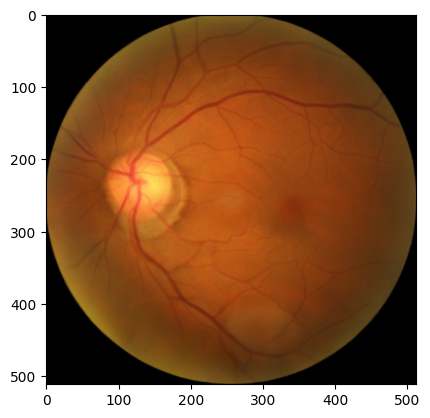

In [5]:
# Then combine with PCENet
led = LEDPipeline(backend='PCE-Net', num_cond_steps=200)
# led.cuda() uncomment if you have gpu
led_pcenet_enhancement = led(low_quality_image)[0]
plt.imshow(led_pcenet_enhancement)
plt.show()

In [6]:
# Then combine with ArcNet
led = LEDPipeline(backend='ArcNet', num_cond_steps=200)
# led.cuda() uncomment if you have gpu
led_arcnet_enhancement = led(low_quality_image)[0]
plt.imshow(led_arcnet_enhancement)
plt.show()

 90%|█████████ | 45/50 [03:39<00:24,  4.87s/it]


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:4                                                                                    │
│                                                                                                  │
│   1 # Then combine with ArcNet                                                                   │
│   2 led = LEDPipeline(backend='ArcNet', num_cond_steps=200)                                      │
│   3 # led.cuda() uncomment if you have gpu                                                       │
│ ❱ 4 led_arcnet_enhancement = led(low_quality_image)[0]                                           │
│   5 plt.imshow(led_arcnet_enhancement)                                                           │
│   6 plt.show()                                                                                   │
│   7                                                                                              │
│                                                                                                  │
│ c:\Projects\com3025cw\.venv\lib\site-packages\torch\autograd\grad_mode.py:27 in decorate_context │
│                                                                                                  │
│    24 │   │   @functools.wraps(func)                                                             │
│    25 │   │   def decorate_context(*args, **kwargs):                                             │
│    26 │   │   │   with self.clone():                                                             │
│ ❱  27 │   │   │   │   return func(*args, **kwargs)                                               │
│    28 │   │   return cast(F, decorate_context)                                                   │
│    29 │                                                                                          │
│    30 │   def _wrap_generator(self, func):                                                       │
│                                                                                                  │
│ c:\Projects\com3025cw\LED\led\pipelines\led_pipeline.py:241 in __call__                          │
│                                                                                                  │
│   238 │   │   │   if t > max_T:                                                                  │
│   239 │   │   │   │   continue                                                                   │
│   240 │   │   │   inputs = torch.cat([image, cond_image], dim=1)                                 │
│ ❱ 241 │   │   │   model_output = self.unet(inputs, t).sample                                     │
│   242 │   │   │   # 2. predict previous mean of image x_t-1 and add variance depending on eta    │
│   243 │   │   │   # eta corresponds to η in paper and should be between [0, 1]                   │
│   244 │   │   │   # do x_t -> x_t-1                                                              │
│                                                                                                  │
│ c:\Projects\com3025cw\.venv\lib\site-packages\torch\nn\modules\module.py:1130 in _call_impl      │
│                                                                                                  │
│   1127 │   │   # this function, and just call forward.                                           │
│   1128 │   │   if not (self._backward_hooks or self._forward_hooks or self._forward_pre_hooks o  │
│   1129 │   │   │   │   or _global_forward_hooks or _global_forward_pre_hooks):                   │
│ ❱ 1130 │   │   │   return forward_call(*input, **kwargs)                                         │
│   1131 │   │   # Do not call functions when jit is used                                          │
│   1132 │   │   full_backward_hooks, non_full_backward_hooks = [], []                             │
│   1133 │   │   if self._backward_hooks or _global_backward_

Downloading: "https://github.com/QtacierP/LED/releases/download/weights/scrnet.pth" to pretrained_weights\scrnet.pth
100%|██████████| 341M/341M [00:22<00:00, 15.7MB/s] 
100%|██████████| 50/50 [03:36<00:00,  4.33s/it]


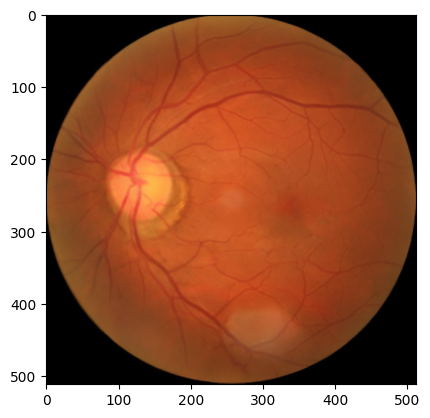

In [ ]:
# Then combine with SCRNet
led = LEDPipeline(backend='SCRNet', num_cond_steps=200)
# led.cuda() uncomment if you have gpu
led_scrnet_enhancement = led(low_quality_image)[0]
plt.imshow(led_scrnet_enhancement)
plt.show()